In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('cs-training.csv')
df.head()

,ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
ID                                      150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [3]:
df=df.set_index('ID',drop=True)   #设置id列为索引列
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
ID,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
states={'SeriousDlqin2yrs':'好坏客户',
        'RevolvingUtilizationOfUnsecuredLines':'可用额度比值',
        'age':'年龄',
        'NumberOfTime30-59DaysPastDueNotWorse':'逾期30-59天笔数',
        'DebtRatio':'负债率',
        'MonthlyIncome':'月收入',
        'NumberOfOpenCreditLinesAndLoans':'信贷数量',
        'NumberOfTimes90DaysLate':'逾期90天笔数',
        'NumberRealEstateLoansOrLines':'固定资产贷款量',
        'NumberOfTime60-89DaysPastDueNotWorse':'逾期60-89天笔数',
        'NumberOfDependents':'家属数量'}
df.rename(columns=states,inplace=True)
df.head()    #修改英文字段名为中文字段名

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
ID,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [5]:
print("月收入缺失比:{:.2%}".format(df['月收入'].isnull().sum()/df.shape[0]))  #月收入数据存在缺失

月收入缺失比:19.82%


In [6]:
print("家属数量缺失比:{:.2%}".format(df['家属数量'].isnull().sum()/df.shape[0]))  #家属数量存在缺失

家属数量缺失比:2.62%


In [7]:
df=df.fillna({'月收入':df['月收入'].mean()})   #填充缺失值
df1=df.dropna()     #删除缺失值
df1.shape

(146076, 11)

通过箱线图观察异常值

[Text(0,0,'信贷数量'), Text(0,0,'固定资产贷款量')]

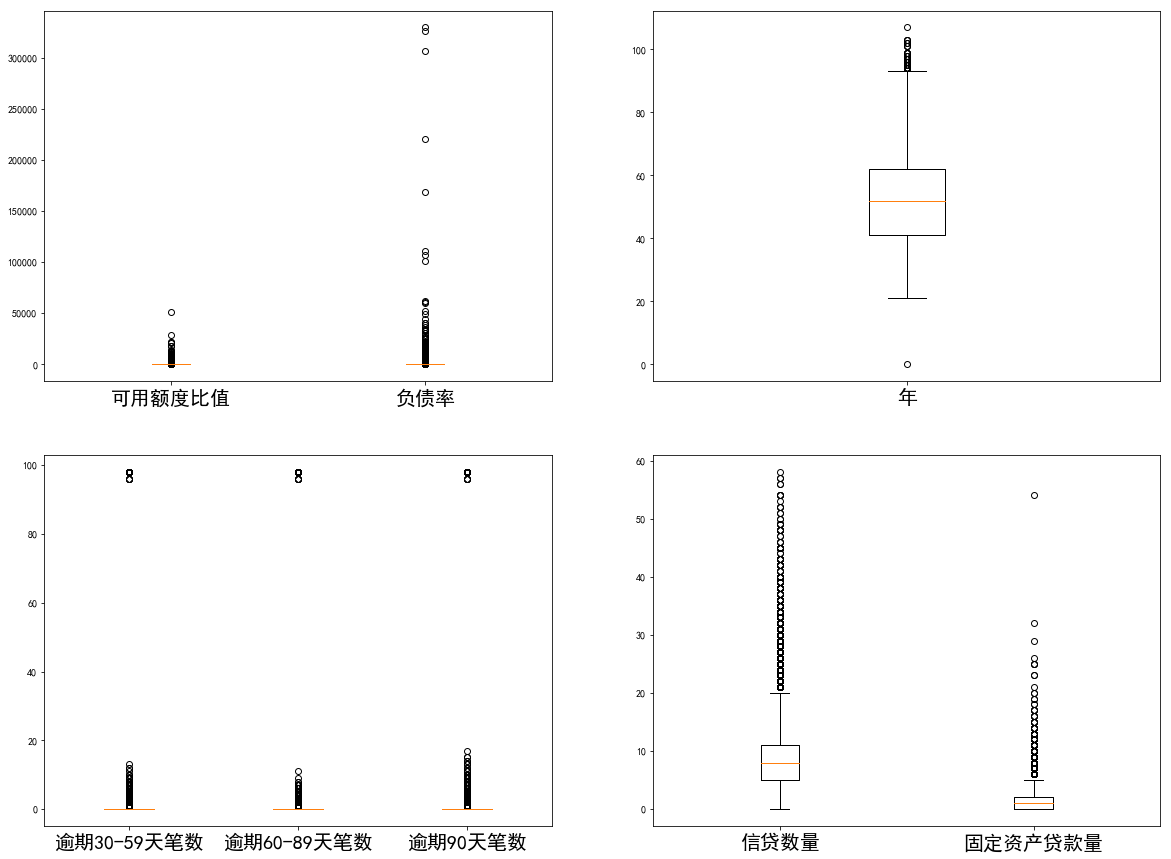

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
x1=df['可用额度比值']
x2=df['负债率']
x3=df1["年龄"]
x4=df1["逾期30-59天笔数"]
x5=df1["逾期60-89天笔数"]
x6=df1["逾期90天笔数"]
x7=df1["信贷数量"]
x8=df1["固定资产贷款量"]
fig=plt.figure(figsize=(20,15))
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
ax1.boxplot([x1,x2])
ax1.set_xticklabels(["可用额度比值","负债率"], fontsize=20)
ax2.boxplot(x3)
ax2.set_xticklabels("年龄", fontsize=20)
ax3.boxplot([x4,x5,x6])
ax3.set_xticklabels(["逾期30-59天笔数","逾期60-89天笔数","逾期90天笔数"], fontsize=20)
ax4.boxplot([x7,x8])
ax4.set_xticklabels(["信贷数量","固定资产贷款量"], fontsize=20)

异常值处理，消除不合逻辑的数据和超级离群的数据

In [9]:
df1=df1[df1['可用额度比值']<1]
df1=df1[df1['年龄']>0]
df1=df1[df1['逾期30-59天笔数']<80]
df1=df1[df1['逾期60-89天笔数']<80]
df1=df1[df1['逾期90天笔数']<80]
df1=df1[df1['固定资产贷款量']<50]
df1.shape

(142559, 11)

单变量分析

In [10]:
age_cut=pd.cut(df1['年龄'],5)  #年龄和好坏客户为例进行分析
age_cut_group=df1['好坏客户'].groupby(age_cut).count()
age_cut_group

年龄
(20.914, 38.2]    26984
(38.2, 55.4]      56660
(55.4, 72.6]      45709
(72.6, 89.8]      12640
(89.8, 107.0]       566
Name: 好坏客户, dtype: int64

In [11]:
age_cut_grouped1=df1["好坏客户"].groupby(age_cut).sum() #坏客户
age_cut_grouped1

年龄
(20.914, 38.2]    2478
(38.2, 55.4]      4067
(55.4, 72.6]      1664
(72.6, 89.8]       273
(89.8, 107.0]       12
Name: 好坏客户, dtype: int64

In [12]:
df2=pd.merge(pd.DataFrame(age_cut_group),pd.DataFrame(age_cut_grouped1),left_index=True,right_index=True)  #坏客户
df2.rename(columns={'好坏客户_x':'总客户数','好坏客户_y':'坏客户数'},inplace=True)
df2

,总客户数,坏客户数
年龄,,
"(20.914, 38.2]",26984,2478
"(38.2, 55.4]",56660,4067
"(55.4, 72.6]",45709,1664
"(72.6, 89.8]",12640,273
"(89.8, 107.0]",566,12


In [13]:
df2.insert(2,"好客户数",df2["总客户数"]-df2["坏客户数"])   #好客户
df2

,总客户数,坏客户数,好客户数
年龄,,,
"(20.914, 38.2]",26984,2478,24506
"(38.2, 55.4]",56660,4067,52593
"(55.4, 72.6]",45709,1664,44045
"(72.6, 89.8]",12640,273,12367
"(89.8, 107.0]",566,12,554


In [14]:
df2.insert(2,"坏客户占比",df2["坏客户数"]/df2["总客户数"])   #坏客户占比
df2

,总客户数,坏客户数,坏客户占比,好客户数
年龄,,,,
"(20.914, 38.2]",26984,2478,0.091832,24506
"(38.2, 55.4]",56660,4067,0.071779,52593
"(55.4, 72.6]",45709,1664,0.036404,44045
"(72.6, 89.8]",12640,273,0.021598,12367
"(89.8, 107.0]",566,12,0.021201,554


Text(0.5,1,'年龄与好坏客户数分布图')

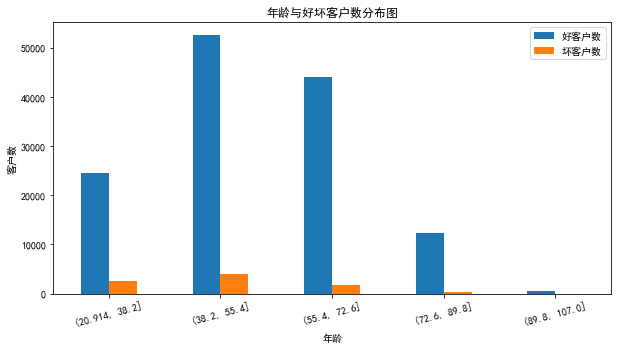

In [15]:
ax1=df2[["好客户数","坏客户数"]].plot.bar(figsize=(10,5))
ax1.set_xticklabels(df2.index,rotation=15)
ax1.set_ylabel("客户数")
ax1.set_title("年龄与好坏客户数分布图")

Text(0.5,1,'坏客户率随年龄的变化趋势图')

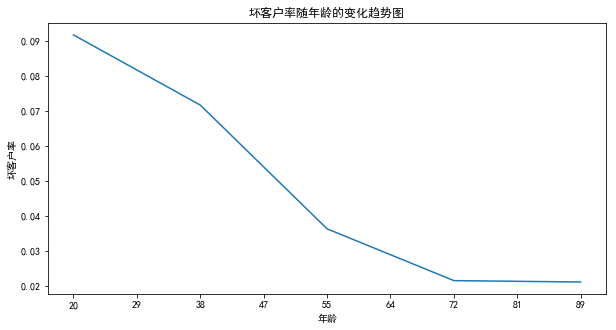

In [16]:
ax11=df2["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")

多变量分析（可以看到各变量之间的相关性比较小，所以不需要操作，一般相关系数大于0.6可以进行变量剔除）

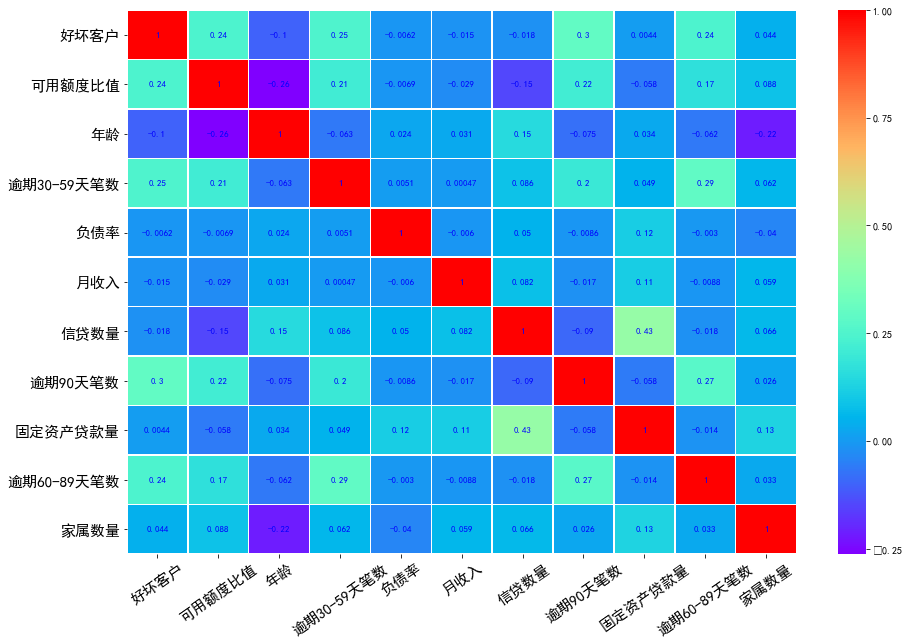

In [17]:
import seaborn as sns
corr = df1.corr()    #计算各变量的相关性系数
xticks = list(corr.index)    #x轴标签
yticks = list(corr.index)    #y轴标签
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(1, 1, 1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()

WOE分箱（Bin：分箱方法一般分为有监督分箱和无监督分箱，其中有监督分箱多为BestK-S方法和ChiMerge方法，无监督分箱多为等频方法、等距方法和聚类方法）

In [18]:
#采用自动分箱办法，导入外部库
#from XXDBinning import *
#from sklearn.model_selection import train_test_split
#df1.head(10)

In [19]:
#train_df,test_df = train_test_split(df1,test_size=0.3,random_state=100,stratify=df1.好坏客户)

In [20]:
#nb = XXDNumberBin()

In [21]:
#nb.monotone_bin(train_df,'年龄','好坏客户',max_bin=5)

In [22]:
#nb.get_bin_stats()

In [23]:
#nb.plot_woe()

In [24]:
#nb.trans_to_woe(test_df['年龄'])

计算的分箱数据

In [25]:
#bins1=[0, 0.029557182, 0.147452386, 0.5190733129999999, 0.9999998999999999]
#bins2=[0,37, 45, 51, 58, 66, 107]
#bins3=[0,1,3,5,13]
#bins4=[0.0,0.23,0.54,99.9]
#bins5=[0, 2915.0, 4211.0, 5699.0, 7000.0, 9832.0, 3008750.0]
#bins6=[0,7,32,57]
#bins7=[-1,0,6,10,17,20]
#bins8=[-1,0,12,22,33]
#bins9=[-1,0,5,11]
#bins10=[-1,0,1,2,13]

In [26]:
#这里采用等频分箱，分箱值可以通过数据导入Excel进行调整
cut1=pd.qcut(df1["可用额度比值"],4,labels=False)
cut2=pd.qcut(df1["年龄"],8,labels=False)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(df1["逾期30-59天笔数"],bins3,labels=False)
cut4=pd.qcut(df1["负债率"],3,labels=False)
cut5=pd.qcut(df1["月收入"],4,labels=False)
cut6=pd.qcut(df1["信贷数量"],4,labels=False)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(df1["逾期90天笔数"],bins7,labels=False)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(df1["固定资产贷款量"],bins8,labels=False)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(df1["逾期60-89天笔数"],bins9,labels=False)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(df1["家属数量"],bins10,labels=False)

In [27]:
rate=df1["好坏客户"].sum()/(df1["好坏客户"].count()-df1["好坏客户"].sum())
def get_woe_data(cut):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe
cut1_woe=get_woe_data(cut1)
cut2_woe=get_woe_data(cut2)
cut3_woe=get_woe_data(cut3)
cut4_woe=get_woe_data(cut4)
cut5_woe=get_woe_data(cut5)
cut6_woe=get_woe_data(cut6)
cut7_woe=get_woe_data(cut7)
cut8_woe=get_woe_data(cut8)
cut9_woe=get_woe_data(cut9)
cut10_woe=get_woe_data(cut10)

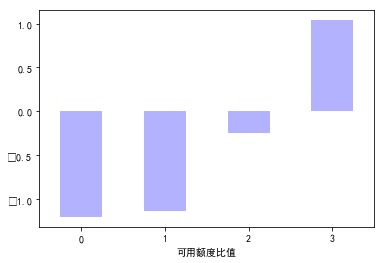

In [28]:
cut1_woe.plot.bar(color='b',alpha=0.3,rot=0)

In [29]:
#随机选择不同的WOE值进行查看
#cut1_woe.plot.bar(color='b',alpha=0.3,rot=0)
#cut2_woe.plot.bar(color='b',alpha=0.3,rot=0)
#cut3_woe.plot.bar(color='b',alpha=0.3,rot=0)
#尽量将WOE调整至具有单调性

IV值计算

Text(0,0.5,'IV')

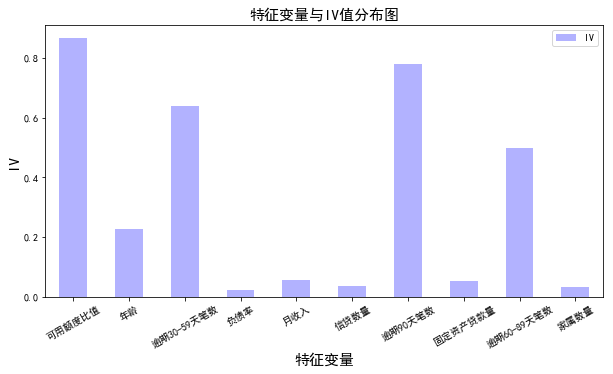

In [30]:
def get_IV_data(cut,cut_woe):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/df1["好坏客户"].sum()-grouped.unstack().iloc[:,0]/(df1["好坏客户"].count()-df1["好坏客户"].sum()))*cut_woe).sum()    
    return cut_IV
#计算各分组的IV值
cut1_IV=get_IV_data(cut1,cut1_woe)
cut2_IV=get_IV_data(cut2,cut2_woe)
cut3_IV=get_IV_data(cut3,cut3_woe)
cut4_IV=get_IV_data(cut4,cut4_woe)
cut5_IV=get_IV_data(cut5,cut5_woe)
cut6_IV=get_IV_data(cut6,cut6_woe)
cut7_IV=get_IV_data(cut7,cut7_woe)
cut8_IV=get_IV_data(cut8,cut8_woe)
cut9_IV=get_IV_data(cut9,cut9_woe)
cut10_IV=get_IV_data(cut10,cut10_woe)
IV=pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV,cut6_IV,cut7_IV,cut8_IV,cut9_IV,cut10_IV],index=['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量','逾期60-89天笔数','家属数量'],columns=['IV'])
iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))
iv.set_title('特征变量与IV值分布图',fontsize=(15))
iv.set_xlabel('特征变量',fontsize=(15))
iv.set_ylabel('IV',fontsize=(15))

#这里可观测IV值
#一般选取IV大于0.02的特征变量进行后续训练

In [31]:
IV

,IV
可用额度比值,0.867677
年龄,0.226285
逾期30-59天笔数,0.638915
负债率,0.021881
月收入,0.056417
信贷数量,0.035331
逾期90天笔数,0.780782
固定资产贷款量,0.052406
逾期60-89天笔数,0.497545
家属数量,0.033580


WOE值替换

In [32]:
df_new=pd.DataFrame()   #新建df_new存放woe转换后的数据
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
    for m in range(len(a)):
        cut.replace(a[m],cut_woe.values[m],inplace=True)
    return cut
df_new["好坏客户"]=df1["好坏客户"]
df_new["可用额度比值"]=replace_data(cut1,cut1_woe)
df_new["年龄"]=replace_data(cut2,cut2_woe)
df_new["逾期30-59天笔数"]=replace_data(cut3,cut3_woe)
df_new["负债率"]=replace_data(cut4,cut4_woe)
df_new["月收入"]=replace_data(cut5,cut5_woe)
df_new["信贷数量"]=replace_data(cut6,cut6_woe)
df_new["逾期90天笔数"]=replace_data(cut7,cut7_woe)
df_new["固定资产贷款量"]=replace_data(cut8,cut8_woe)
df_new["逾期60-89天笔数"]=replace_data(cut9,cut9_woe)
df_new["家属数量"]=replace_data(cut10,cut10_woe)
df_new.head()

,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
ID,,,,,,,,,,,
1,1,1.044468,0.246969,1.701683,0.191066,-0.321369,0.045474,-0.345338,0.665870,-0.244603,0.197472
2,0,1.044468,0.316890,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,0.097683
3,0,1.044468,0.316890,0.899640,-0.151014,0.289489,0.222781,1.990279,0.197418,-0.244603,-0.150675
4,0,-0.247395,0.518166,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,-0.150675
5,0,1.044468,0.166515,0.899640,-0.151014,-0.321369,-0.255957,-0.345338,-0.235787,-0.244603,-0.150675


模型训练

In [33]:
from sklearn.linear_model import LogisticRegression   #导入sklearn库
from sklearn.model_selection import train_test_split
x=df_new.iloc[:,1:]
y=df_new.iloc[:,:1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=0)
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print('测试成绩：{}'.format(clf.score(x_test,y_test)))

C:\Users\liujingqi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\liujingqi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


测试成绩：0.9418841189674523


In [34]:
#求特征权值系数coe，用于后面训练结果转分值
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[0.61989446, 0.43134418, 0.56430583, 1.25749488, 0.57175676,
        0.21792504, 0.59060072, 0.63754235, 0.46566219, 0.37090962]])

In [35]:
y_pred=clf.predict(x_test)

模型评估

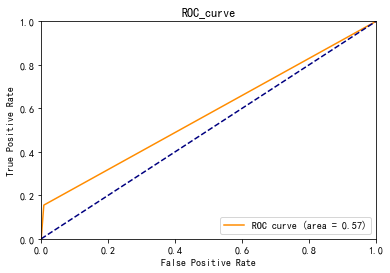

In [36]:
#主要通过ROC曲线、AUC值和K-S值
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
#AUC值
roc_auc

0.5735502586388265

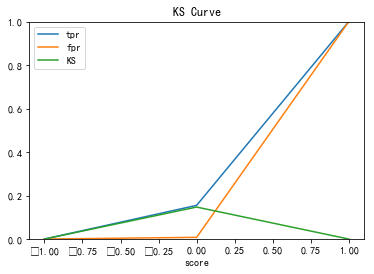

<Figure size 1440x1440 with 0 Axes>

In [38]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()

In [39]:
#K-S值
max(tpr-fpr)

0.14710051727765305

模型结果转换成评分

In [40]:
#假设好坏比为20的时候分数为600分，每高20分好坏比翻一倍，现在我们求每个变量不同woe值对应的分数刻度可得：
factor = 20/np.log(2)
offset = 600 - 20*np.log(20)/np.log(2)
def get_score(coe,woe,factor):
    scores=[]
    for w in woe:
        score=round(coe*w*factor,0)
        scores.append(score)
    return scores
x1 = get_score(coe[0][0], cut1_woe, factor)
x2 = get_score(coe[0][1], cut2_woe, factor)
x3 = get_score(coe[0][2], cut3_woe, factor)
x4 = get_score(coe[0][3], cut4_woe, factor)
x5 = get_score(coe[0][4], cut5_woe, factor)
x6 = get_score(coe[0][5], cut6_woe, factor)
x7 = get_score(coe[0][6], cut7_woe, factor)
x8 = get_score(coe[0][7], cut8_woe, factor)
x9 = get_score(coe[0][8], cut9_woe, factor)
x10 = get_score(coe[0][9], cut10_woe, factor)
print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("负债率对应的分数:{}".format(x4))
print("月收入对应的分数:{}".format(x5))
print("信贷数量对应的分数:{}".format(x6))
print("逾期90天笔数对应的分数:{}".format(x7))
print("固定资产贷款量对应的分数:{}".format(x8))
print("逾期60-89天笔数对应的分数:{}".format(x9))
print("家属数量对应的分数:{}".format(x10))

可用额度比值对应的分数:[-22.0, -20.0, -4.0, 19.0]
年龄对应的分数:[6.0, 4.0, 3.0, 2.0, -0.0, -5.0, -11.0, -13.0]
逾期30-59天笔数对应的分数:[-8.0, 15.0, 28.0, 38.0, 43.0]
负债率对应的分数:[-5.0, -2.0, 7.0]
月收入对应的分数:[5.0, 2.0, -3.0, -5.0]
信贷数量对应的分数:[1.0, -2.0, -1.0, 0.0]
逾期90天笔数对应的分数:[-6.0, 34.0, 47.0, 56.0, 56.0]
固定资产贷款量对应的分数:[4.0, -4.0, -3.0, 1.0, 12.0]
逾期60-89天笔数对应的分数:[-3.0, 25.0, 36.0, 40.0]
家属数量对应的分数:[-2.0, 1.0, 2.0, 3.0, 4.0, 7.0]


计算客户总分

In [41]:
bins1=[0, 0.029557182, 0.147452386, 0.5190733129999999, 0.9999998999999999]
bins2=[0,21,37,45,51,58,66,75,107]
bins3=[-1,0,1,3,5,13]
bins4=[0.0,0.23,0.54,99.9]
bins5=[2815.0,4211.0,7000.0,9832.0,3008750.0]
bins6=[0,7,20,32,57]
bins7=[-1, 0, 1, 3,5, 20]
bins8=[-1, 0,1,2, 3, 33]
bins9=[-1, 0, 1, 3, 12]
bins10=[-1, 0, 1, 2, 3, 5, 21]

In [42]:
def compute_score(series,bins,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(bins) - 2
        m = len(bins) - 2
        while j >= 0:
            if value >= bins[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list
path2='cs-training.csv'
test1 = pd.read_csv(path2)
test1['x1'] = pd.Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'],bins1, x1))
test1['x2'] = pd.Series(compute_score(test1['age'],bins2, x2))
test1['x3'] = pd.Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], bins3, x3))
test1['x4'] = pd.Series(compute_score(test1['DebtRatio'],bins4, x4))
test1['x5'] = pd.Series(compute_score(test1['MonthlyIncome'],bins5, x5))
test1['x6'] = pd.Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'],bins6, x6))
test1['x7'] = pd.Series(compute_score(test1['NumberOfTimes90DaysLate'], bins7, x7))
test1['x8'] = pd.Series(compute_score(test1['NumberRealEstateLoansOrLines'], bins8, x8))
test1['x9'] = pd.Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], bins9, x9))
test1['x10'] = pd.Series(compute_score(test1['NumberOfDependents'], bins10, x10))
test1['Score'] = test1['x1']+test1['x2']-test1['x3']-test1['x4']-test1['x5']+test1['x6']-test1['x7']+test1['x8']-test1['x9']-test1['x10']+600
test1.to_csv('target.csv', index=False)